In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
data = np.loadtxt("exampledata2.txt")

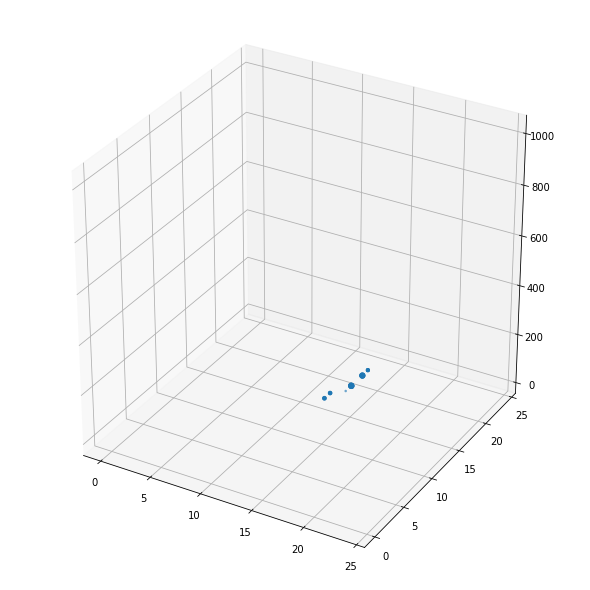

In [46]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
ax.scatter(data[:,0], data[:,1], data[:,2],s=DQ)
plt.show()

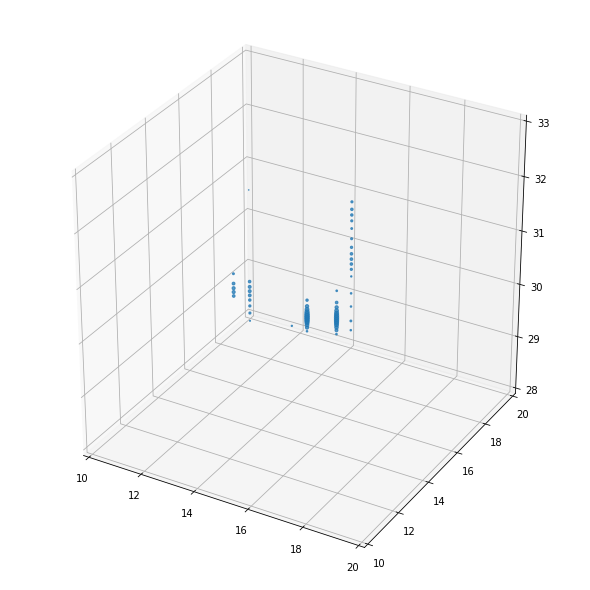

In [47]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<0.5]=0
ax.scatter(data[:,0], data[:,1], data[:,2],s=DQ*0.7)
ax.set_xlim(10,20)
ax.set_ylim(10,20)
ax.set_zlim(20,80)
ax.set_zlim(28,33)
plt.show()

In [48]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 13) and (yy == 13):
        tes.append(data[:,2][x])
        tes2.append(data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

34

In [49]:
tes

array([ 28.,  57.,  86., 115., 144., 173., 202., 231., 260., 289., 318.,
       347., 376., 405., 434., 463., 492., 521., 550., 579., 608., 637.,
       666., 695., 724., 753., 782., 811., 840., 869., 898., 927., 956.,
       985.])

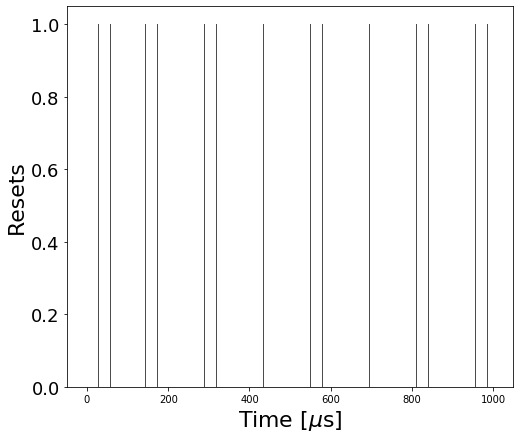

In [51]:
plt.figure(figsize=(8,7))
bins = np.arange(0,1000,1)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

(array([41.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  9.,  8.]),
 array([0.0111727 , 0.61005543, 1.20893816, 1.80782089, 2.40670362,
        3.00558635, 3.60446908, 4.20335181, 4.80223454, 5.40111727,
        6.        ]),
 <a list of 10 Patch objects>)

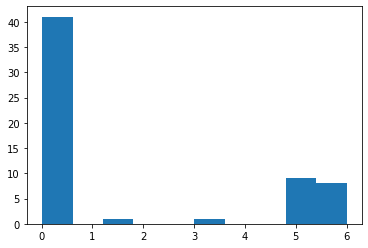

In [24]:
plt.hist( tes2)

In [196]:
tes

array([14., 29., 45., 60., 75., 90.])

In [3]:
from mpl_toolkits.mplot3d import Axes3D

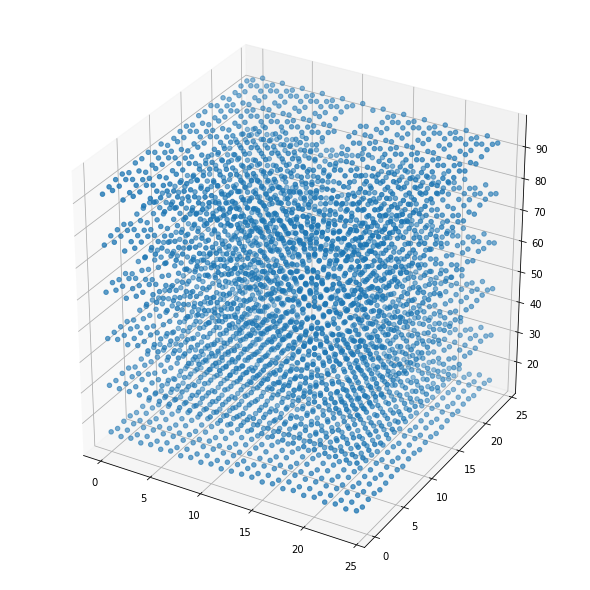

In [72]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

In [199]:
N_Pixel = np.unique(data[:,0])
#N_Pixel = [1]

In [200]:
t = []

X_POS = []
Y_POS = []
T_POS = []
S_POS = []
for x in N_Pixel:
    for y in N_Pixel:
        X_POS_hold = []
        Y_POS_hold = []
        T_POS_hold = []
        S_POS_hold = []
        S_POS_hold.append(0)
        
        for q in range(0,len(data)):
            if (data[:,0][q] == x) and (data[:,1][q] == y):
                #print(data[:,2][q])
                #t.append(data[:,2][q])
                X_POS_hold.append(x)
                Y_POS_hold.append(y)
                T_POS_hold.append(data[:,2][q])
                S_POS_hold.append(data[:,2][q])
        X_POS.append(X_POS_hold)
        Y_POS.append(Y_POS_hold)
        T_POS.append(T_POS_hold)
        S_POS.append(np.diff(S_POS_hold))
        

In [201]:
xxx = [item for sublist in X_POS for item in sublist]
yyy = [item for sublist in Y_POS for item in sublist]
ttt = [item for sublist in T_POS for item in sublist]
#NewS = np.diff(S_POS,axis=1)
sss = [item for sublist in S_POS for item in sublist]
sss = 1/np.array(sss)
sss[sss<1]=0

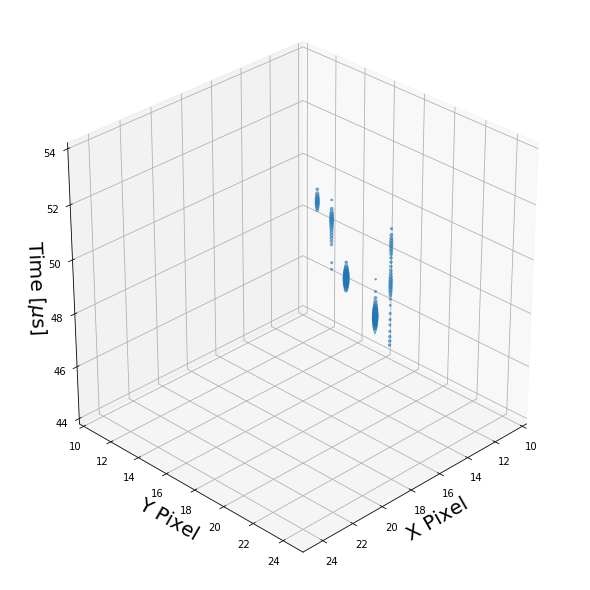

In [209]:


fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(xxx, yyy, ttt,s = sss)
ax.set_xlim(10,25)
ax.set_ylim(10,25)
ax.set_zlim(44,54)

ax.set_xlabel('X Pixel', fontsize=20, rotation=150)
ax.set_ylabel('Y Pixel', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
ax.view_init(azim=45)
plt.show()

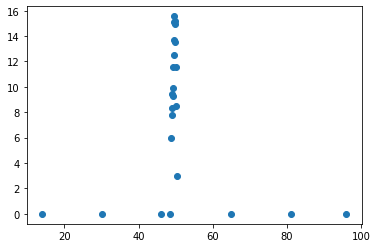

In [225]:
one = []
two = []

for q in range(0,len(xxx)):
    if (xxx[q]==13) & (yyy[q]==15):
        one.append(ttt[q])
        two.append(sss[q])
        
plt.scatter(one,two)

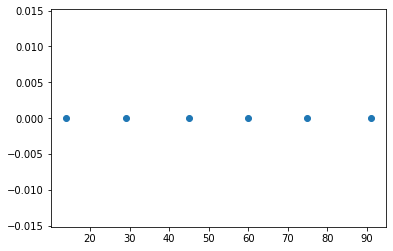

In [212]:
plt.scatter(one,two)

In [168]:
from scipy.optimize import curve_fit


In [226]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,one,two,p0=[1,50,1])
print(popt)

[14.31885711 49.5934482  -0.53715358]


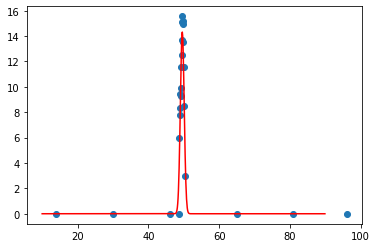

In [227]:
xval = np.arange(10,90,0.1)
plt.scatter(one,two)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [228]:
E_vel = 1.648#; //mm/mus
DiffusionL = 682.23/1e6#;  //mm**2/mus
DiffusionT = 1315.86/1e6#; //mm**2/mus

In [229]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

946.4719673094633

In [230]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

574.3155141440918

In [183]:
2*DiffusionL

0.00136446

In [186]:
(0.89174177)**2

0.7952033843627329

In [210]:
50*1.648

82.39999999999999

In [184]:
1/min(sss)

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


inf

In [185]:
1/5

0.2

In [42]:
len(T_POS[0])

17

In [55]:
np.diff(S_POS)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [13]:
start = data[:,2][0]
for ss in range(1,len(data[:,2])):
    print(start-data[:,2][ss])
    start = data[:,2][ss]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [12]:
np.diff(tes)

array([6.    , 5.    , 6.    , 6.    , 5.    , 6.    , 5.    , 3.8126,
       0.3907, 0.2451, 0.1774, 0.1417, 0.1267, 0.1039, 0.0752, 0.0903,
       0.0863, 0.0784, 0.0787, 0.0758, 0.072 , 0.0718, 0.0683, 0.0732,
       0.0687, 0.0696, 0.0706, 0.0565, 0.0741, 0.0704, 0.0769, 0.0813,
       0.0861, 0.0924, 0.0989, 0.1062, 0.1284, 0.1488, 0.1377, 0.2612,
       0.555 , 3.0491, 6.    , 6.    , 6.    , 5.    , 6.    , 6.    ,
       5.    ])

In [26]:
(data[:,1] ==13) and (data[:,0] ==13)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
wh = np.where((data[:,1] ==13) and (data[:,0] ==13))[0]
wh

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

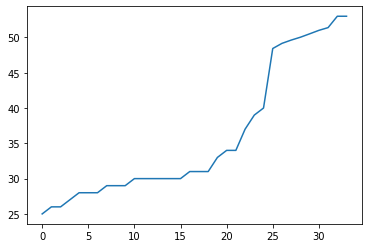

In [16]:
plt.plot(data[:,2][wh])

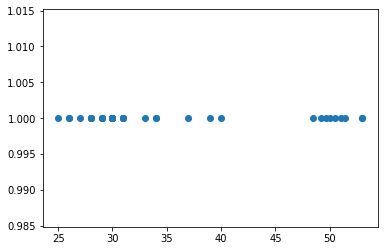

In [17]:
plt.scatter(data[:,2][wh],np.ones(len(data[:,2][wh])))

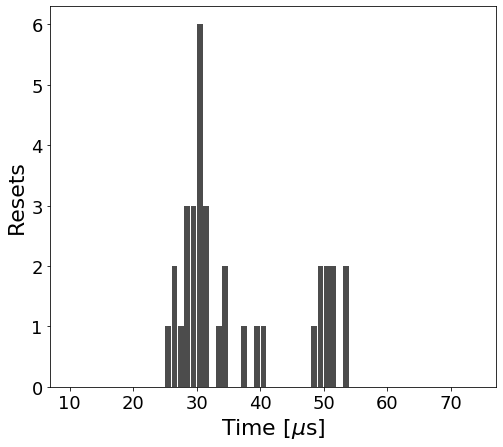

In [20]:
plt.figure(figsize=(8,7))
bins = np.arange(10,75,1)
plt.hist(data[:,2][wh],bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [28]:
np.arange(40,55,1)

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])

In [43]:
s = np.random.poisson(2, 100)
np.sum(s)

189

In [70]:
s = np.random.normal(20,5, 10)
np.sum(s)

198.33935410494936